In [1]:
# You need to have tensorflow, keras, and sciann installed in your system. 
# On google cloud, uncomment next line to install sciann. 

!pip install sciann 
!git clone https://github.com/sciann/sciann-applications.git
!cp /content/sciann-applications/SciANN-LaplaceEq-Forward/sciann_datagenerator.py /content/sciann_datagenerator.py 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 5.1 MB/s 
     |████████████████████████████████| 460.3 MB 5.6 kB/s 
     |████████████████████████████████| 561 kB 45.2 MB/s 
     |████████████████████████████████| 14.8 MB 36.5 MB/s 
     |████████████████████████████████| 4.0 MB 42.7 MB/s 
     |████████████████████████████████| 462 kB 7.9 MB/s 
     |████████████████████████████████| 132 kB 8.8 MB/s 
     |████████████████████████████████| 1.2 MB 51.5 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68722 sha256=34ff02e023c49cd8efc1a84064c08518f17503f39356b3a692bcb49d40db429d
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
     

Cloning into 'sciann-applications'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 219 (delta 50), reused 164 (delta 21), pack-reused 0
Receiving objects: 100% (219/219), 17.96 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [2]:
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from sciann_datagenerator import * 

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



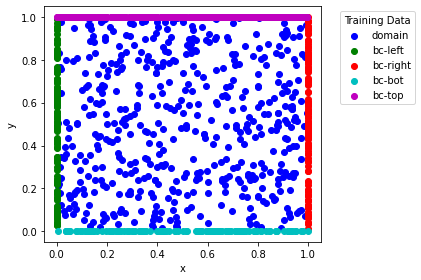

In [3]:
dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=1000)
dg.plot_data()

In [4]:
x = sn.Variable('x')
y = sn.Variable('y')
T = sn.Functional('T', [x,y], 4*[40], 'tanh', res_net=True)

In [5]:
L1 = sn.diff(T, x, order=2) + sn.diff(T, y, order=2)
BC_top1 = (y==1.)*(x<0.5)*sn.abs(T - 2*x)
BC_top2 = (y==1.)*(x>=0.5)*sn.abs(T - (2-2*x))
BC_left = (x==0.)*sn.abs(T)
BC_right = (x==1.)*sn.abs(T)
BC_bot = (y==0.)*sn.abs(T)


In [6]:
m = sn.SciModel([x,y], [L1, BC_top1, BC_top2, BC_left, BC_right, BC_bot], optimizer='adam')

In [7]:
dg = DataGeneratorXY([0.,1.], [0.,1.], num_sample=10000, 
                     targets=['domain', 'bc-top', 'bc-top', 'bc-left', 'bc-right', 'bc-bot'])
input_data, target_data = dg.get_data()

In [9]:
h = m.train(input_data, target_data, 
            epochs=1,#recommended epoch 1000
            learning_rate=0.001,
            batch_size=200,
            adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True}
           )


Total samples: 12500 
Batch size: 200 
Total batches: 63 


+ NTK evaluation time [s]: 12.278818845748901 

+ adaptive_weights at epoch 1: [0.023763630205376016, 0.5331377936372356, 0.4266325527695701, 1.402362915990736, 1.1859331878561878, 2.4281699269914747]
63/63 [==============================] - 26s 37ms/step - batch: 31.0000 - size: 198.4127 - loss: 0.0745 - add_loss: 0.5131 - mul_3_loss: 0.0976 - mul_6_loss: 0.0515 - mul_7_loss: 0.0031 - mul_8_loss: 0.0119 - mul_9_loss: 0.0013 - lr: 0.0010 - time: 37.8304 - loss_weight_0: 0.0238 - loss_weight_1: 0.5331 - loss_weight_2: 0.4266 - loss_weight_3: 1.4024 - loss_weight_4: 1.1859 - loss_weight_5: 2.4282 - loss_gradient_0: 6739.3689 - loss_gradient_1: 288.9464 - loss_gradient_2: 353.4759 - loss_gradient_3: 149.3110 - loss_gradient_4: 185.2939 - loss_gradient_5: 90.9396


In [10]:
x_test, y_test = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))

In [11]:
T_test = T.eval([x_test, y_test])

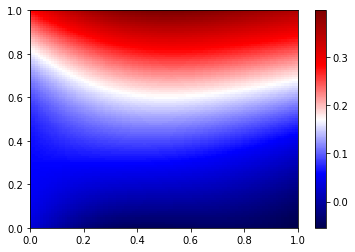

In [13]:
im = plt.pcolor(x_test, y_test, T_test, cmap='seismic')
plt.colorbar(im)

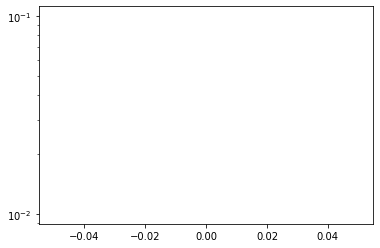

In [14]:
plt.semilogy(h.history['loss'])